In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as stats

In [2]:
### Read in the data
filename='homework1_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,P_hPa,R_inches
0,842.63,0.0
1,842.58,0.0
2,842.13,0.0
3,842.38,0.0
4,842.57,0.0


In [3]:
P_mean = data['P_hPa'].mean()
print(f'Avg Pressure = {np.round(P_mean,2)}') 

P_avg = data[data.R_inches>=0.01]['P_hPa'].mean()
print(f'Avg Pressure when Raining = {np.round(P_avg,2)}') 

Avg Pressure = 846.33
Avg Pressure when Raining = 847.03


In [4]:
#### Calculate the 95% and 99% confidence limits on the 21st century warming using t-statistic
#### Assume that the global warming is normally distributed.  (See page 18 of Barnes notes)
Pressure = data['P_hPa']
P_std = data['P_hPa'].std()

N=len(Pressure)
df=N-1

# t-statistic
tstat95=stats.t.ppf(0.975,df)
low_limit95=P_mean-tstat95*(P_std/np.sqrt(N-1))
high_limit95=P_mean+tstat95*(P_std/np.sqrt(N-1))
print(f'95% confidence limits - t-statistic: {np.round(low_limit95,2)} < X < {np.round(high_limit95,2)}')

# z-statistic
zstat95=stats.norm.ppf(0.975)
low_limit95=P_mean-zstat95*(P_std/np.sqrt(N-1))
high_limit95=P_mean+zstat95*(P_std/np.sqrt(N-1))
print(f'95% confidence limits - z-statistic: {np.round(low_limit95,2)} < X < {np.round(high_limit95,2)}')

if (P_avg<low_limit95) or (P_avg>high_limit95):
    print('Can reject the null hypthesis.')
else:
    print('Cannot reject the null hypthesis.')    

95% confidence limits - t-statistic: 846.21 < X < 846.45
95% confidence limits - z-statistic: 846.21 < X < 846.45
Can reject the null hypthesis.


In [5]:
P_rain = data[data.R_inches>=0.01]['P_hPa']
Num_P_rain = len(P_rain)

### Now Bootstrap Nbs times to generate a distribution of randomly selected mean SWE.
Nbs=1000
## initialize array
P_Bootstrap=np.empty((Nbs,Num_P_rain))
## loop over to fill in array with randomly selected values
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(data.P_hPa,Num_P_rain)

## Calculate the means of your randomly selected SWE values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)


P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print(f'Btsp Avg = {round(P_Bootstrap_mean_avg,2)}')

P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print(f'Btsp Std = {round(P_Bootstrap_mean_std,2)}')

P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print(f'Btsp Min = {round(P_Bootstrap_mean_min,2)}')

P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print(f'Btsp Max = {round(P_Bootstrap_mean_max,2)}')

Btsp Avg = 846.34
Btsp Std = 0.28
Btsp Min = 845.36
Btsp Max = 847.29


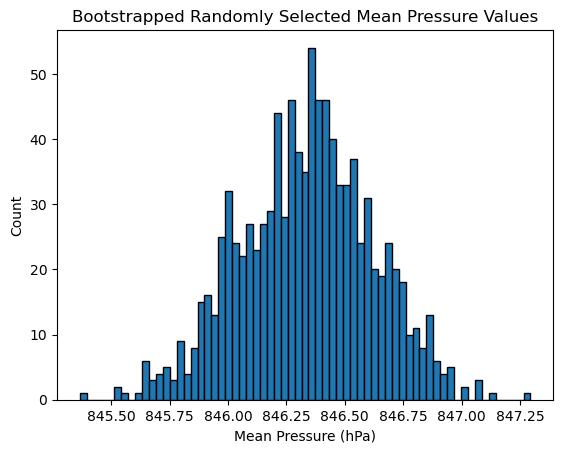

In [6]:
### Use matplotlib to plot a histogram of the bootstrapped means to compare to the conditioned SWE mean
binsize=0.03
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black')
plt.xlabel('Mean Pressure (hPa)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Pressure Values');

In [7]:
sample_mean=P_avg
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_rain=(sample_mean-population_mean)/xstd

In [8]:
zcrit = stats.norm.ppf(0.975)

if z_rain > zcrit:
    print('Can reject the null hypothesis')
    print(f'zrain: {round(z_rain,2)} > zcrit: {round(zcrit,2)}')
else:
    print('Cannot reject the null hypothesis')

Can reject the null hypothesis
zrain: 2.45 > zcrit: 1.96
